In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

datos = pd.read_csv("housing.csv")
datos["pop_per_household"] = datos["population"]/datos["households"]

X_train_sc = scaler.fit_transform(datos["pop_per_household"].values.reshape(-1,1))

In [2]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,pop_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.181467


<Axes: xlabel='latitude', ylabel='longitude'>

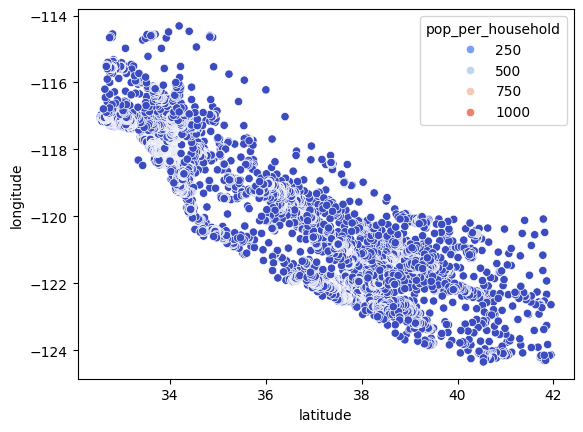

In [5]:
import seaborn as sb
sb.scatterplot(x="latitude",y="longitude", data=datos, hue="pop_per_household",palette="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

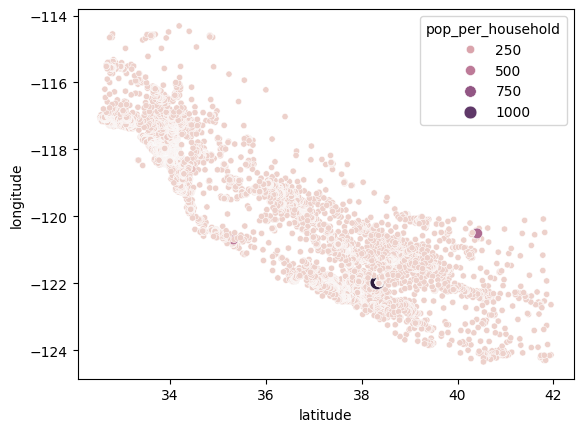

In [7]:
sb.scatterplot(x="latitude",y="longitude", data=datos, hue="pop_per_household",
               size=datos["pop_per_household"],sizes=(20,100))

In [11]:
datos.loc[:,["latitude","longitude","pop_per_household"]]

,latitude,longitude,pop_per_household
0,37.88,-122.23,2.555556
1,37.86,-122.22,2.109842
2,37.85,-122.24,2.802260
3,37.85,-122.25,2.547945
4,37.85,-122.25,2.181467
...,...,...,...
20635,39.48,-121.09,2.560606
20636,39.49,-121.21,3.122807
20637,39.43,-121.22,2.325635
20638,39.43,-121.32,2.123209


In [64]:
from sklearn.cluster import KMeans
X = datos.loc[:,["latitude","longitude","pop_per_household"]]
modelo = KMeans(n_clusters=5)
predicciones = modelo.fit_predict(X)


In [65]:
predicciones.shape

(20640,)

In [66]:
X["densidad"] = predicciones
X

,latitude,longitude,pop_per_household,densidad
0,37.88,-122.23,2.555556,3
1,37.86,-122.22,2.109842,3
2,37.85,-122.24,2.802260,3
3,37.85,-122.25,2.547945,3
4,37.85,-122.25,2.181467,3
...,...,...,...,...
20635,39.48,-121.09,2.560606,3
20636,39.49,-121.21,3.122807,3
20637,39.43,-121.22,2.325635,3
20638,39.43,-121.32,2.123209,3


In [67]:
X["densidad"].value_counts()

densidad
0    11962
3     8674
2        2
4        1
1        1
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

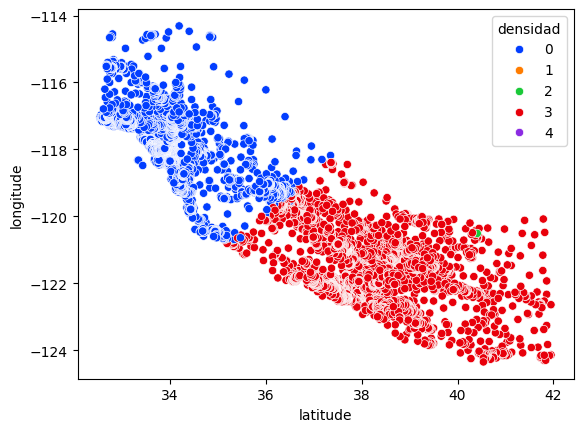

In [68]:
sb.scatterplot(x="latitude",y="longitude", data=X, hue="densidad",palette="bright")

C:\Users\joseA\AppData\Local\Temp\ipykernel_12340\2673513074.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x="densidad",data=X, palette="bright")


<Axes: xlabel='densidad', ylabel='count'>

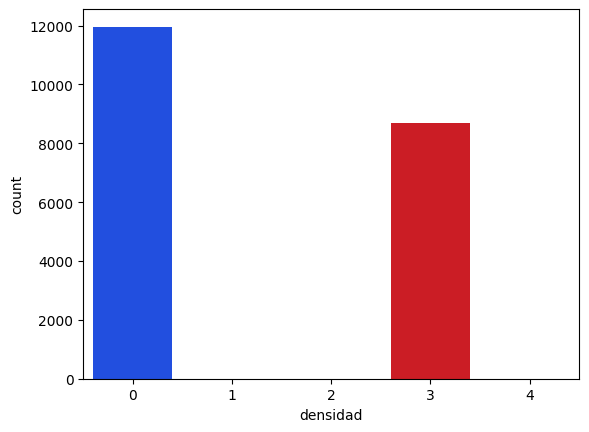

In [69]:
sb.countplot(x="densidad",data=X, palette="bright")

In [70]:
X.groupby(["densidad"])["pop_per_household"].mean()

densidad
0       3.062056
1    1243.333333
2     551.087912
3       2.786987
4     230.172414
Name: pop_per_household, dtype: float64